# **HOUSE PRICE PREDICTIONS IN CALIFORNIA**

oleh : Ian Arif Rahman

## **CONTENTS**
**1. Business Problem Understanding**

**2. Data Understanding & Cleaning**

**3. Data Preprocessing**

**4. Modeling**

**5. Conclusion**

**6. Recommendation**

## **1. Business Problem Understanding**

###**Background**
Seiring bertambahnya jumlah populasi manusia, mendorong ketersediaan akan tempat tinggal menjadi hal yang krusial. Ketersediaan lahan yang terbatas disuatu daerah tertentu yang relatif tetap dengan jumlah manusia yang terus bertambah menjadi salah satu alasan kenapa harga rumah selalu naik setiap tahunnya. Namun, penentuan harga rumah yang tidak tepat akan menjadi bumerang untuk developer. Oleh karena itu, menjadi penting kita prediksikan harga rumah ini dengan landasan fitur-fitur yang ada dengan memanfaatkan teknologi salah satunya computer science.

[Dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices) yang akan digunakan ini berkaitan dengan rumah-rumah yang ditemukan di distrik California tertentu dan beberapa ringkasan statistik tentang rumah-rumah tersebut berdasarkan data sensus tahun 1990. Adapun Kolomnya adalah sebagai berikut : longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity.

### **Problem**
Menjadi tantangan setiap developer didaerah california untuk menentukan harga rumah yang tepat dan sesuai dengan kebutuhan dan kondisi dilapangan karena pembangunan properti bersifat ireversible/tidak bisa diulang, jadi dituntut jangan sampai salah menentukan.

### **Goals**
mendapatkan prediksi harga rumah terbaik berdasarkan matriks evaluasi dari beberapa model yang sebagian besar adalah algoritma boosting yang diyakini mempunyai performa lebih baik

### **Analytical Approach**

Analytical approach yang akan kita gunakan adalah model regresi, bukan klasifikasi karena merupakan yang cocok untuk case seperti ini

### **Metric Evaluation**
Matriks evaluation yang akan digunakan adalah Root Mean Squared Error (RMSE) & R-squared (R2). Alasannya adalah karena menurut [sumber](https://induraj2020.medium.com/which-metrics-in-regression-matter-the-most-mse-rmse-mae-r2-adj-r2-advantages-disadvantages-55740cb873ec), kedua matriks evaluation tersebut mudah untuk diinterpretasikan

## **2. Data Understanding & Cleaning**
Dataset ini tentang data rumah-rumah yang ditemukan di distrik California tertentu dan beberapa statistik ringkasan tentang mereka berdasarkan data sensus 1990. Setiap baris data merepresentasikan informasi deskripsi properti dan lokasinya.
mari kita mulai dengan import library yang dibutuhkan :

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [172]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/PURWADHIKA/Capstone3-ML/housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Kolom yang akan menjadi target prediksi kita adalah **median_house_value**. Jadi untuk selanjutnya, **median_house_value** yang akan kita sebut **target** dan selain itu disebut **fiture**.

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Terdapat 10 kolom dengan penjelasan :
*   2 data kordinat lokasi -> longitude & latitude
*   7 data angka -> housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value
*   1 data string -> ocean_proximity

Disamping itu, kita bisa lihat semua kolom memiliki non-null sejumlah 20640, kecuali kolom total_bedrooms. ini mengindikasikan **ada missing value**. Mari kita explore.

In [174]:
# Checking Missing Value
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Ada **207 missing value** pada **total_bedrooms** dari **20640** data. Kita akan coba mengecek penyebaran datanya untuk memutuskan bagaimana harus dihandle.

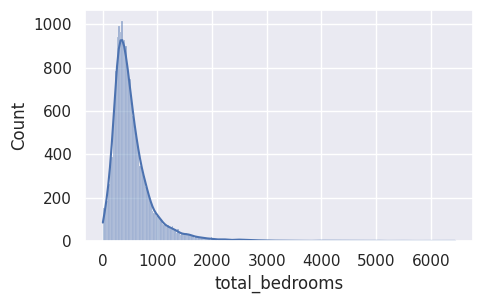

In [175]:
#total_bedrooms distribution
plt.figure(figsize= (5, 3))
sns.histplot(df['total_bedrooms'], kde= True)
plt.show()

dari histogram diatas terkonfirmasi bahwa distribusi data adalah **positive Skewness**. Kita memutuskan untuk tidak mendrop missing value karena akan kehilangan cukup banyak data (207), jadi kita putuskan untuk **mengisi dengan nilai median**.

In [176]:
# fill missing value by median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace= True)

In [177]:
# konfirmasi checking missing value
df.isnull().sum()
# Result -> Missing Value = 0

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [178]:
# Check Duplicate Value
df.duplicated().sum()

0

**Tidak ada duplicate data**, kita bisa lanjutkan ketahap berikutnya.

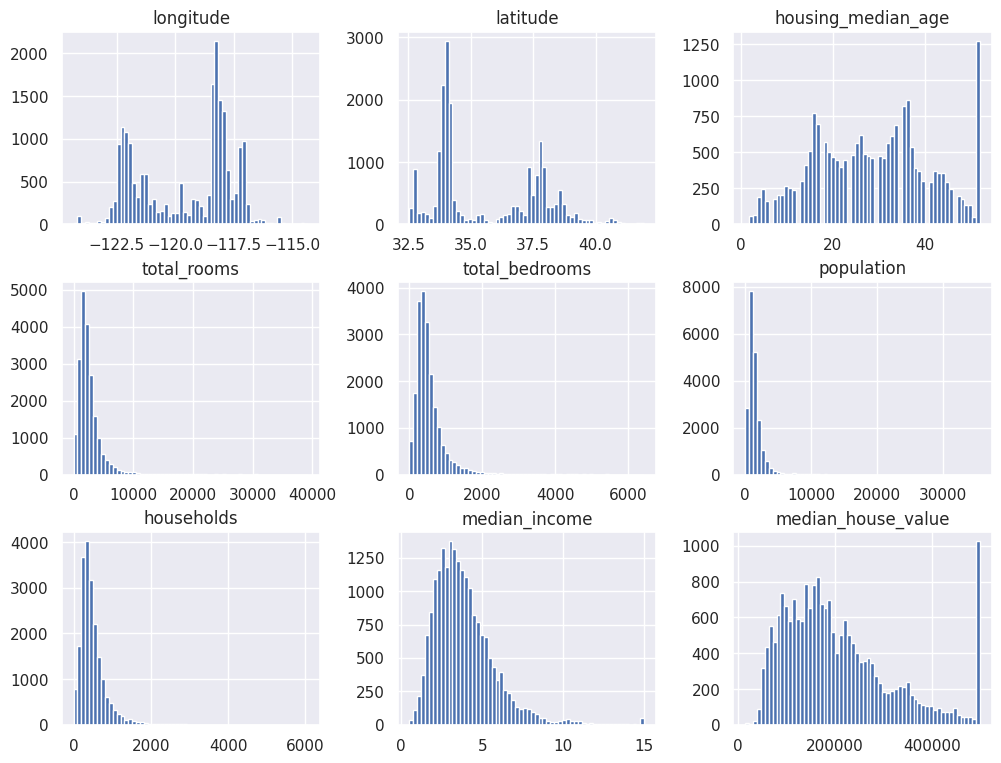

In [179]:
# Check Distribusi Data
df.hist(bins=60,figsize=(12,9))
plt.show()

Hampir semua kolom tidak terdistribusi normal. kolom housing_median_age & median_house_value memiliki outliers yang extreme. kita akan melakukan **log transform** ke semua kolom agar distribusinya bisa mendekati distribusi normal. untuk outliers kita akan coba eksplore lebih lanjut dengan **histogram & boxplot**

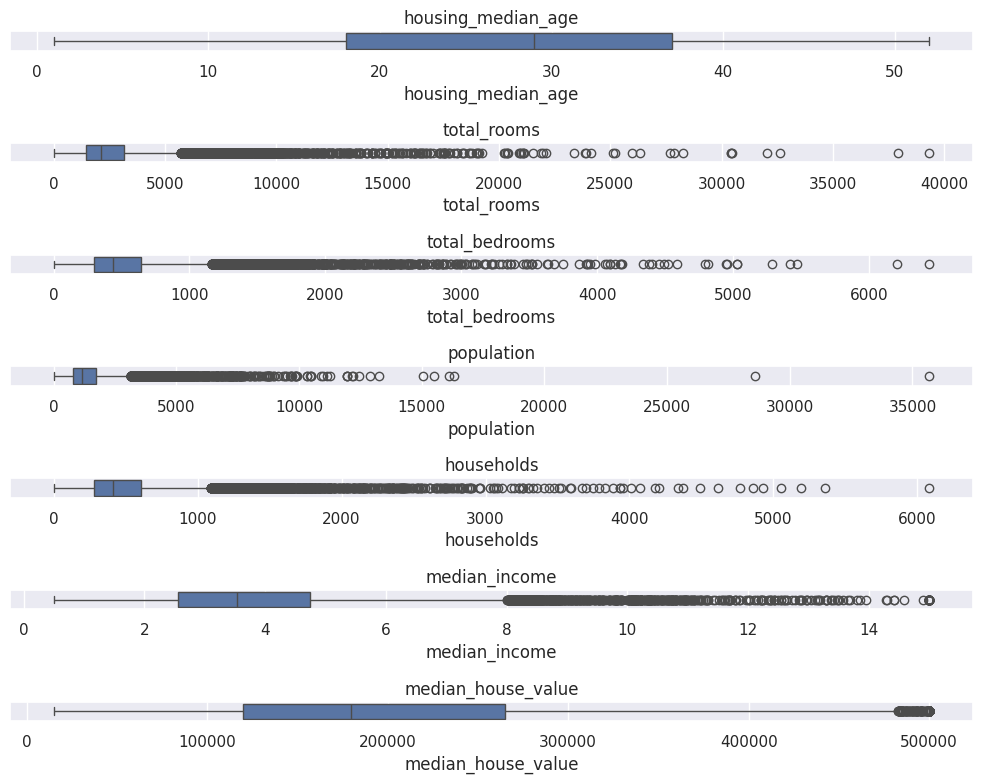

In [180]:
# Pengecekan Outliers
feature = ['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']
plt.figure(figsize=(10, 8))

for idx, col in enumerate(feature, start=1):
    plt.subplot(7, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Dari boxplot ini, kita bisa simpulkan bahwa **hampir semua kolom mempunyai nilai outliers** dan jumlahnya banyak. Kita memutuskan **mempertahankan outliers ini kecuali yang sangat extreme** seperti yang terjadi di **housing_median_age & median_house_value** yang terlihat digrafik histogramnya. Kita berpandangan jika melakukan drop dengan sebanyak itu outliers, maka akan membuat data yang bisa diolah sedikit. itupun menjadi tidak baik karena kurang merepresentasikan data yang sebenarnya. Seperti yang sebelumnya dikatakan, mari kita fokus ke kolom **housing_median_age & median_house_value** untuk dianalisis outliersnya.

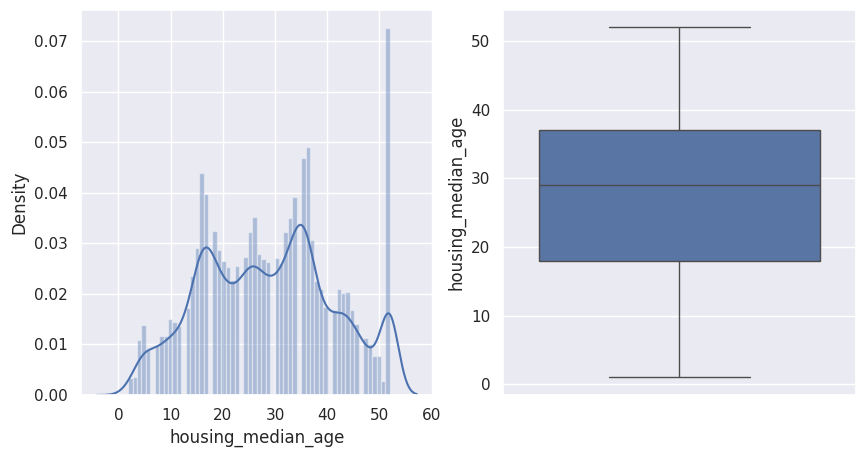

In [181]:
# Explore outliers housing median age

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['housing_median_age'],bins=60)

plt.subplot(1,2,2)
sns.boxplot(df['housing_median_age'],)
plt.show()

Dari grafik diatas, kita bisa simpulkan outliers memiliki frekuensi paling besar didata. mari kita cari dengan rangking by count menggunakan crossstab

In [182]:
pd.crosstab(index=df['housing_median_age'],
            columns='Count').sort_values(by='Count', ascending=False).head(3)

col_0,Count
housing_median_age,
52.0,1273
36.0,862
35.0,824


Dari tabel diatas, bisa kita lihat outliers extreme **housing_median_age** ada nilai **52.0** dengan jumlah **1273** data. Kita akan drop ini supaya tidak menganggu pemodelan.


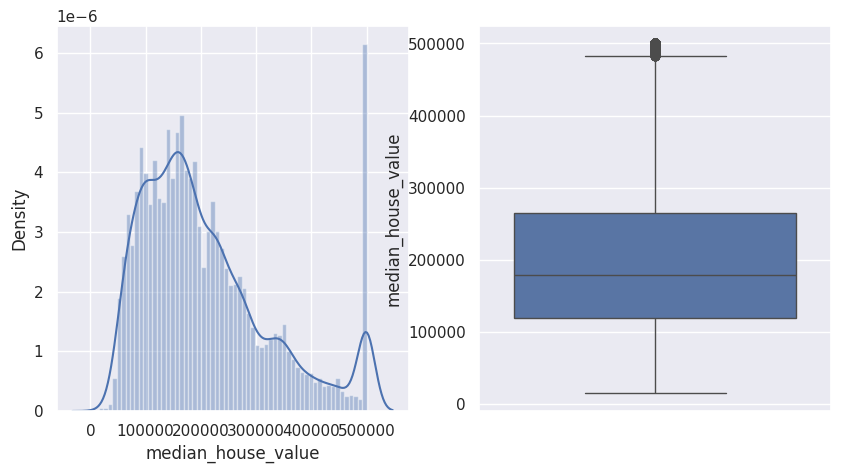

In [183]:
# Explore outliers median house value

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['median_house_value'],bins=60)

plt.subplot(1,2,2)
sns.boxplot(df['median_house_value'],)
plt.show()

Sama seperti grafik sebelumnya, kita bisa simpulkan outliers memiliki frekuensi paling besar didata. mari kita cari dengan rangking by count menggunakan crossstab

In [184]:
pd.crosstab(index=df['median_house_value'],
            columns='Count').sort_values(by='Count', ascending=False).head(3)

col_0,Count
median_house_value,
500001.0,965
137500.0,122
162500.0,117


Dari tabel diatas, bisa kita lihat outliers extreme **median_house_value** ada nilai **500001.0** dengan jumlah **965** data. Kita akan drop ini supaya tidak menganggu pemodelan.


In [185]:
# Drop Otliers Extreme
df = df.drop(df[df['housing_median_age'] == 52.0].index)
df = df.drop(df[df['median_house_value'] == 500001.0].index)

In [186]:
# Check Data Shape
df.shape

(18572, 10)

setelah pembersihan dari extreme outliers, data sekarang berjumlah **18572** dari sebelumnya **20640**. jadi ada sekitar **2068** data yang sudah tereliminasi karena prores-proses diatas.

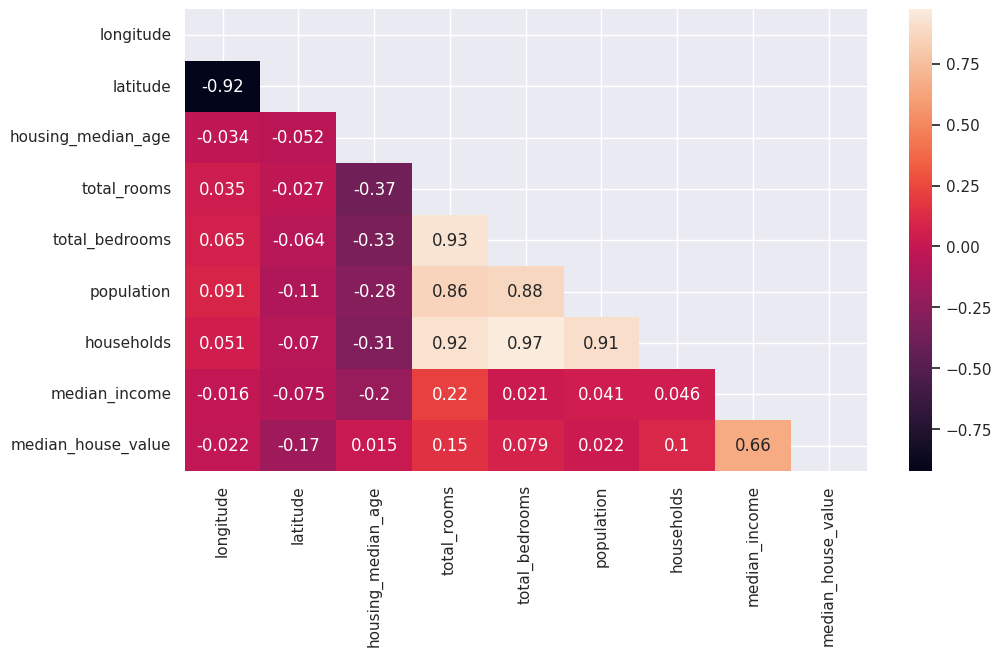

In [187]:
# Heatmap Corr
plt.figure(figsize= (11,6))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot= True, mask=mask)
plt.show()

Dari heatmap diatas, kita bisa simpulkan korelasi terbaik dari target kita **median_house_value** adalah dengan **median_income** yaitu sebesar **0.66**

**Ocean Proximity** adalah satu-satunya kolom yang bertype string/object. Sebelum kita akan lakukan proses engineering dikolom ini, mari kita eksplore dulu datanya sebagai berikut :

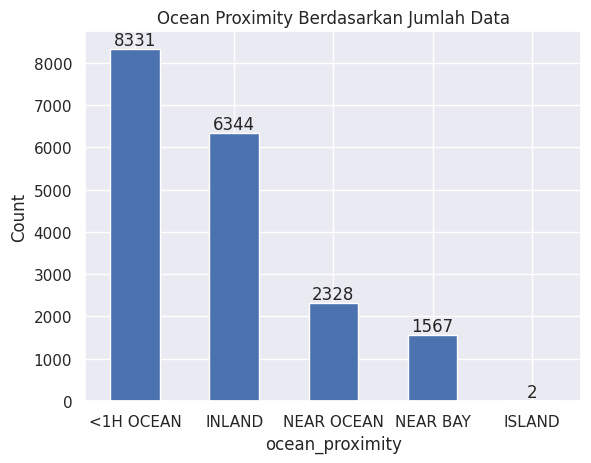

In [188]:
# Countplot ocean_proximity
ax = df['ocean_proximity'].value_counts().plot(kind='bar',title='Ocean Proximity Berdasarkan Jumlah Data')
for container in ax.containers:
    ax.bar_label(container)
ax.set_xlabel('ocean_proximity')
ax.set_ylabel('Count')
plt.xticks(rotation ='horizontal')
plt.grid(True)
plt.show()

Ada **5 Unique value** dalam kolom **ocean_proximity**, yang tertinggi adalah **<1H OCEAN**, dari sini kita bisa melihat, orang lebih menyukai rumah yang berjarak 1 jam dari laut, peringkat keduanya adalah **INLAND**. Karena kita memiliki data **longitude & latitude**, maka kita coba tampilkan kordinatnya dalam scatterplot.

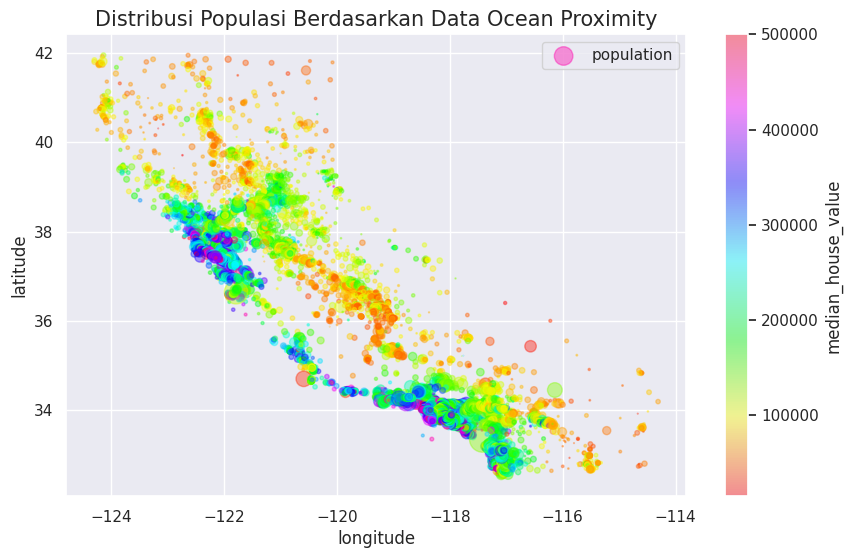

In [189]:
# Ocean Proximity Distribution
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
        s=df['population']/100, label='population', figsize=(10,6),
        c='median_house_value', cmap=plt.get_cmap('hsv'),colorbar=True,
    )
plt.title('Distribusi Populasi Berdasarkan Data Ocean Proximity',size=15)
plt.legend()
plt.show()

kita bisa lihat sebaran populasi paling padat diarah barat daya yang menurut sumber dari [wikipedia-california-map](https://id.wikipedia.org/wiki/Templat:Location_map_USA_California), merupakan **daerah dekat laut**.

##**3. Data Preprocessing**


**Add Fitur**

Dari kolom yang tersedia, kita bisa menambahkan beberapa fiture yang merupakan hasil operasi matematika dengan kolom yang ada yang dirasa cukup common untuk menjadi pertimbangan dalam mempengaruhi harga jual rumah, diantaranya :
*   Ruangan per rumah tangga (rooms_per_household)
*   Ruang tidur per Ruangan (bedrooms_per_room)

In [190]:
# Add Fitur
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']

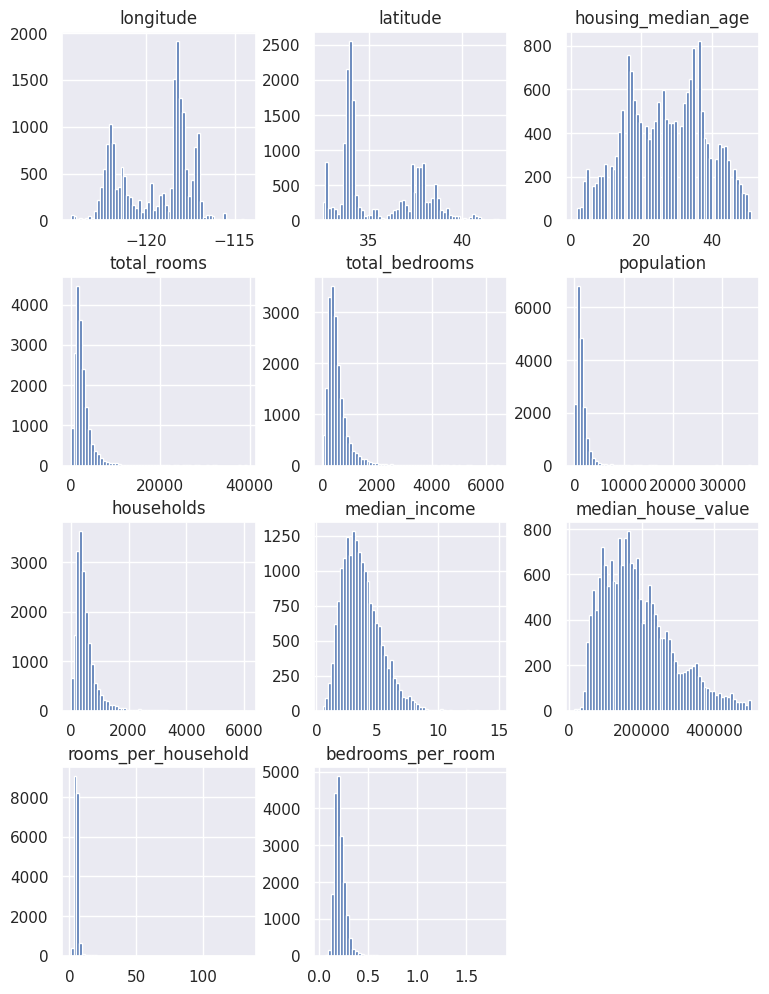

In [191]:
# Check Distribusi Data setelah penambahan fitur
df.hist(bins=60,figsize=(9,12))
plt.show()

Dari histogram diatas, terlihat bahwa **2 fitur yang baru ditambahkan juga memiliki distribusi positive skewness**. nantinya akan kita scaling juga dengan menggunakan logaritmic scale. Untuk mengkonfirmasi, kita akan menggunakan fungsi untuk menentukan kolom itu skew atau distribusi normal dengan log transform di step berikutnya.

**Fitur Transform -> Log Transformation**

Kita perlu melakukan transformasi untuk fitur yang akan digunakan menggunakan log transformation. log transform membantu mengurangi kemiringan saat kita memiliki data yang skewed. stepnya sebagai berikut

In [192]:
X = df.drop(['median_house_value'], axis=1)
y = np.log(df.median_house_value) # Applying log transformation

In [193]:
skew_df = pd.DataFrame(X.select_dtypes(np.number).columns, columns= ['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(X[feature]))
skew_df['Abs_Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Abs_Skew'].apply(lambda x: True if x > 0.5 else False)
skew_df

,Feature,Skew,Abs_Skew,Skewed
0,longitude,-0.343730,0.343730,False
1,latitude,0.519874,0.519874,True
2,housing_median_age,-0.057071,0.057071,False
3,total_rooms,4.172618,4.172618,True
4,total_bedrooms,3.447571,3.447571,True
5,population,4.930678,4.930678,True
6,households,3.379025,3.379025,True
7,median_income,0.890333,0.890333,True
8,rooms_per_household,16.556224,16.556224,True
9,bedrooms_per_room,3.803799,3.803799,True


Kita bisa menarik kesimpulan bahwa **hanya fitur latitude & housing_median_age yang terdistribusi normal**. Mari kita rangkum apa saja tindakan yang akan dilakukan dengan alasannya sebagai berikut :
*   longitude, latitude -> **None**, Ini karena kita mengasumsikan angka kordinat lokasi tidak mempengaruhi proses machine learning
*   housing median age, total rooms, total bedrooms, population, households, median income, rooms per household, bedrooms per room -> **log transform**, ini didapat dari tabel seleksi diatas.
*   ocean proximity -> **label encoding**, jelas karena ini salah satu cara merubah feature object ke numerik


In [194]:
skewed_columns = skew_df[skew_df['Abs_Skew'] > 0.52]['Feature'].values # 0,52 untuk mengeliminasi latitude (passtrough)
skewed_columns

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'rooms_per_household', 'bedrooms_per_room'],
      dtype=object)

In [195]:
for column in skewed_columns:
    X[column] = np.log(X[column])

**Encoding**

Agar kolom kategorikal bisa digunakan, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan label encoding karena posisi rumah mempunyai tingkatan berdasarkan jarak ke laut (makin dekat dengan laut, angkanya makin besar). untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [196]:
encoder=LabelEncoder()
X['ocean_proximity']=encoder.fit_transform(X['ocean_proximity'])

In [197]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,6.779922,4.859812,5.774552,4.836282,2.119287,3,1.943640,-1.920110
1,-122.22,37.86,21.0,8.867709,7.008505,7.783641,7.037028,2.116424,3,1.830682,-1.859204
8,-122.26,37.84,42.0,7.845808,6.499787,7.095064,6.388561,0.732560,3,1.457246,-1.346020
15,-122.26,37.85,50.0,7.021084,5.645447,6.546785,5.575949,0.753772,3,1.445135,-1.375637
18,-122.26,37.84,50.0,7.713785,6.120297,6.897705,6.037871,0.688687,3,1.675914,-1.593487


**Scaling -> Standar Scaler**

Standard Scaler dipilih karena karakteristik kumpulan data masukan sangat berbeda antar rentangnya, atau hanya ketika diukur dalam satuan ukuran yang berbeda.

In [198]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index= X.index, columns= X.columns)

In [199]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-1.385831,1.064775,1.226098,-1.166625,-1.690767,-1.760937,-1.611414,2.059417,1.379236,1.124267,-1.436107
1,-1.380783,1.055463,-0.523452,1.654793,1.304226,0.993679,1.431735,2.052898,1.379236,0.703845,-1.186007
8,-1.400977,1.046150,1.313576,0.273804,0.595141,0.049588,0.535048,-1.098130,1.379236,-0.686053,0.921312
15,-1.400977,1.050807,2.013396,-0.840721,-0.595696,-0.702145,-0.588617,-1.049832,1.379236,-0.731130,0.799695
18,-1.400977,1.046150,2.013396,0.095389,0.066182,-0.221007,0.050120,-1.198028,1.379236,0.127811,-0.094877


##**4. Data Modeling**

**Splitting Data**

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

**Modeling**

Dalam modeling, kita akan mencoba 7 algoritma untuk mencari siapa model yang terbaik yang nantinya akan kita gunakan kedalam prediksi dengan 3 algoritma dasar dan 4 algoritma boosting. Alasan menggunakan lebih banyak algoritma boosting karena menurut [sumber](https://medium.com/@rezapurnama1997/mengenal-catboost-algoritma-boosting-yang-membuat-machine-learning-lebih-efektif-5d679bab4966), algoritma boosting membuat performance machine learning lebih baik.






In [201]:
# Linear Regresion
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
ln_rmse = np.sqrt(mean_squared_error(y_test, predictions_lr))
ln_r2 = r2_score(y_test, predictions_lr)

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)
knn_rmse = np.sqrt(mean_squared_error(y_test, predictions_knn))
knn_r2 = r2_score(y_test, predictions_knn)

# Random Forest
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, predictions_rf))
rf_r2 = r2_score(y_test, predictions_rf)

# Catboost
catboost = CatBoostRegressor(verbose= 0)
catboost.fit(X_train, y_train)
predictions_cb = catboost.predict(X_test)
cb_rmse = np.sqrt(mean_squared_error(y_test, predictions_cb))
cb_r2 = r2_score(y_test, predictions_cb)

# XGBoost
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)
predictions_xgb = xgboost.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, predictions_xgb))
xgb_r2 = r2_score(y_test, predictions_xgb)

# LightGBM
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
predictions_lgb = lgb.predict(X_test)
lgb_rmse = np.sqrt(mean_squared_error(y_test, predictions_lgb))
lgb_r2 = r2_score(y_test, predictions_lgb)

# Gradient Boosting
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
predictions_gbr = gbr.predict(X_test)
gbr_rmse = np.sqrt(mean_squared_error(y_test, predictions_gbr))
gbr_r2 = r2_score(y_test, predictions_gbr)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2352
[LightGBM] [Info] Number of data points in the train set: 14857, number of used features: 11
[LightGBM] [Info] Start training from score 12.018706


**Evaluation Matrix**

Evaluation Matrix yang kita gunakan adalah RMSE & R-Square, alasannya adalah menurut [sumber](https://induraj2020.medium.com/which-metrics-in-regression-matter-the-most-mse-rmse-mae-r2-adj-r2-advantages-disadvantages-55740cb873ec), keduanya termasuk yang mudah untuk diinterpretasikan. Berikut tabel perbandingan Eva matrics kita :

In [202]:
# Evaluation Matrix Model
pd.DataFrame({
    'Model': ['Linear Regression','KNN Regressor','Random Forest','Catboost','XGBoost','LightGBM','Gradient Boosting'],
    'RMSE': [ln_rmse,knn_rmse,rf_rmse,cb_rmse,xgb_rmse,lgb_rmse,gbr_rmse],
    'R-square': [ln_r2, knn_rmse,rf_r2,cb_r2,xgb_r2,lgb_r2,gbr_r2]
}).T

,0,1,2,3,4,5,6
Model,Linear Regression,KNN Regressor,Random Forest,Catboost,XGBoost,LightGBM,Gradient Boosting
RMSE,0.313278,0.276569,0.215244,0.204017,0.20921,0.214466,0.251982
R-square,0.656412,0.276569,0.837803,0.854283,0.846769,0.838974,0.777711


Dari tabel diatas kita bisa melihat nilai RMSE dan R-square semua algoritma. Model terbaik menurut RMSE adalah yang bernilai paling kecil. **RMSE terkecil dimiliki oleh Catboost senilai	0.204017**. Sedangkan untuk R-square, model terbaik adalah ketika nilai R-squarenya paling besar yang juga sama yaitu Catboost dengan nilai **0.854283**. Sehingga, **kita bisa simpulkan model terbaik adalah Catboost**

In [203]:
# best Model -> Catboost
final_predictions = predictions_cb

In [204]:
rmse = mean_squared_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print('RMSE final:', rmse)
print('R-square final:', r2)

RMSE final: 0.04162282135289225
R-square final: 0.854282866592071


**Back to Original Scale**

Proses berikutnya adalah mengembalikan skala ke awal yaitu dengan fungsi anti log yaitu exponensial.

In [205]:
# Back to original scale
final_predictions = np.exp(final_predictions)
y_test = np.exp(y_test)

**Actual vs Prediction Price**

Setelah proses yang dijalani, mari kita compare antara prediksi dan actual dalam tabel dan grafik seperti dibawah ini.

In [214]:
pd.DataFrame({'Actual': y_test, 'Predicted': final_predictions.round(2)})

,Actual,Predicted
12869,133000.0,123378.19
8961,332800.0,305008.51
20309,194400.0,205956.15
17392,117600.0,135862.51
6961,198600.0,221112.45
...,...,...
6255,155800.0,150739.21
3759,174200.0,204438.56
859,247600.0,243243.48
18315,406300.0,340433.64


Tabel diatas adalah nilai actual dan prediksi terbaik menurut proses-proses yang sudah dijalani. untuk gambaran lebih baik, mari kita tampilkan dalam bentuk grafik seperti gambar dibawah ini

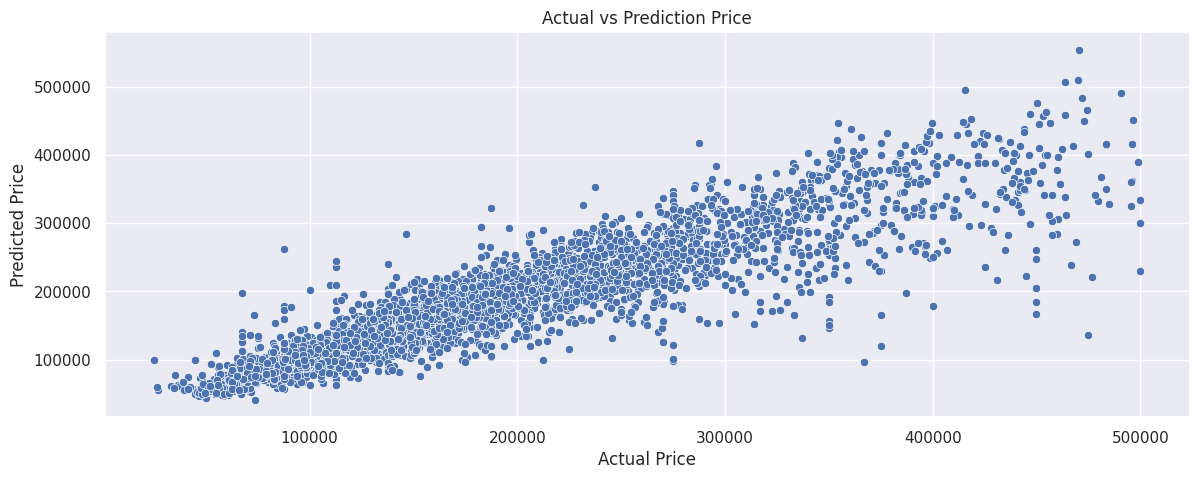

In [207]:
# Visual Result
plt.figure(figsize=(14, 5))
sns.scatterplot(x= y_test, y= final_predictions).set(title='Actual vs Prediction Price',
                                                     xlabel='Actual Price', ylabel='Predicted Price')

plt.show()

Berdasarkan grafik diatas, perbandingan antara nilai harga yang diprediksi dengan harga actual terlihat cukup bagus dengan membentuk suatu pola yg linear. Namun masih terdapat sedikit error yang dimana terkadang ada data yang diprediksi nilainya rendah namun nilai aktualnya tinggi

## **5. Conclusion**
Dari proses yang sudah kita lakukan, kita bisa simpulkan untuk case dataset ini, 3 algoritma boosting relatif lebih perform dibandingkan dengan yang lain dan untuk random forest performanya cukup bisa bersaing.

## **6. Recommendation**

Ada beberapa improvement yang bisa lakukan kedepannya untuk mengembangkan model agar lebih baik lagi diantaranya :

*   Bisa ditambahkan informasi lain yang berhubungan langsung dengan harga rumah seperti fasilitas, luas, developer rangking, dll
*   Jika dimungkinkan, bisa update data terbaru. karena dataset yang diolah adalah data lama ditahun 1990. Tentu bisa jadi sudah ada bangunan baru disekitar lokasi dan membuat harganyapun jadi sudah tidak relevan dengan keadaan sekarang.
*   Untuk model, bisa dilakukan tuning agar hasilnya lebih baik lagi. Banyak pilihan yang tersedia yang bisa digunakan di hyperparameter tuning.
*   Memprediksi harga rumah tentu sangat terpengaruh dengan waktu karena harga rumah relatif naik setiap tahun, sehingga perlu ada data yang berkesinambungan sedangkan ini ada gap sekitar hampir 30 tahun





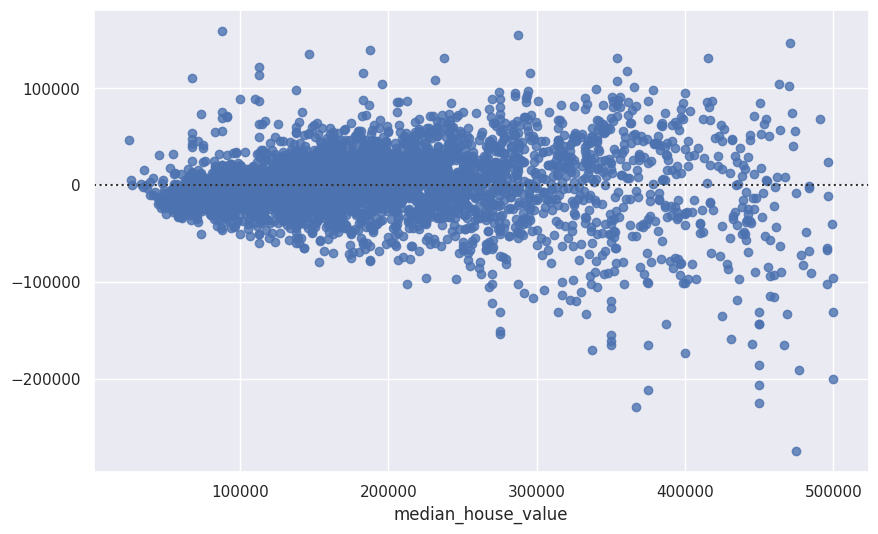

In [208]:
plt.figure(figsize= (10, 6))
sns.residplot(x= y_test, y = final_predictions)
plt.show()

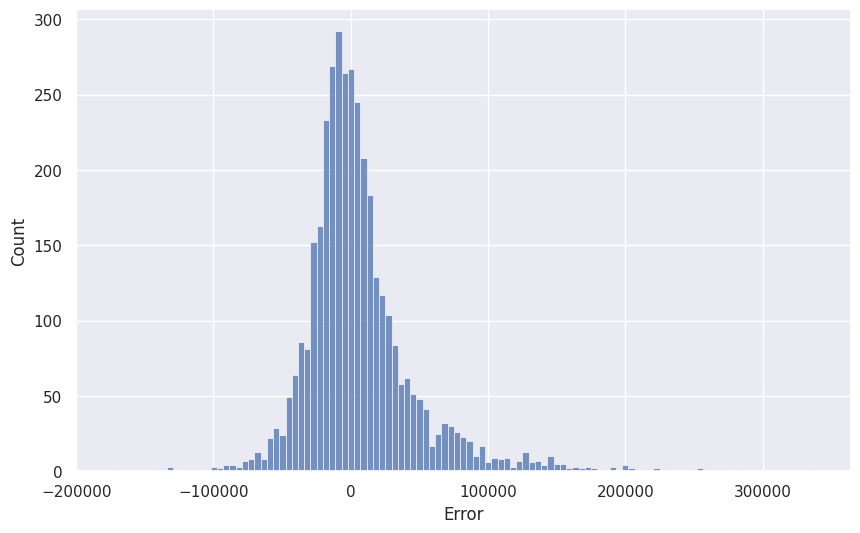

In [209]:
resid = y_test - final_predictions
plt.figure(figsize= (10, 6))
sns.histplot(resid)
plt.xlabel('Error');

### **Save Model**

In [210]:
import pickle
with open('bestmodel','wb') as r:
  pickle.dump(final_predictions,r)